### ZADANIE 1.

Poniżej podany jest zestaw danych. Zawiera on brakujące wartości. Twoim zadaniem jest przygotować ten zestaw danych do obróbki, a następnie wytrenować klasyfikator przewidujący choroby serca dobierając ilość kroków oraz learning rate za pomocą modelu xgboost.

Wartością docelową jest num

Celem jest:
1. Oczyszczenie zbioru z kolumn pustych
2. Uzupełnienie danych tam, gdzie to konieczne (W przypadku punktu 1. i 2. zoptymalizują proces oczyszczania,, aby zachować sens, jak i liczebność zbioru)
3. Zaproponuj metodę testowania modeli, aby zredukować problem overfittingu (możliwe jest cross-validation). Przeprowadź proces optymalizacji.
4. Wytrenuj ostateczny model

Zbiór danych: heart.csv

In [1]:
import xgboost as xgb
import numpy as np
import time
from sklearn import datasets
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, roc_curve, precision_recall_curve
import pandas as pd
import sklearn.model_selection as msel
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [13]:
df = pd.read_csv("heart_NO_Missing_Data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130.0,132.000000,0,2,185.0,0,0.0,0
1,29,1,2,120.0,243.000000,0,0,160.0,0,0.0,0
2,29,1,2,140.0,250.472119,0,0,170.0,0,0.0,0
3,30,0,1,170.0,237.000000,0,1,170.0,0,0.0,0
4,31,0,2,100.0,219.000000,0,1,150.0,0,0.0,0


In [14]:
df['chol'] = df['chol'].astype(int)

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130.0,132,0,2,185.0,0,0.0,0
1,29,1,2,120.0,243,0,0,160.0,0,0.0,0
2,29,1,2,140.0,250,0,0,170.0,0,0.0,0
3,30,0,1,170.0,237,0,1,170.0,0,0.0,0
4,31,0,2,100.0,219,0,1,150.0,0,0.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       292 non-null    int64  
 1   sex       292 non-null    int64  
 2   cp        292 non-null    int64  
 3   trestbps  292 non-null    float64
 4   chol      292 non-null    int64  
 5   fbs       292 non-null    int64  
 6   restecg   292 non-null    int64  
 7   thalach   292 non-null    float64
 8   exang     292 non-null    int64  
 9   oldpeak   292 non-null    float64
 10  num       292 non-null    int64  
 11  num_cat   292 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 27.5 KB


In [16]:
df['sex'] = df['sex'].astype(object)
df['cp'] = df['cp'].astype(object)
df['num'] = df['num'].astype(object)
df['fbs'] = df['fbs'].astype(object)
df['exang'] = df['exang'].astype(object)
df['restecg'] = df['restecg'].astype(object)

In [17]:
encoder = LabelEncoder()
for col in ('sex', 'cp', 'num', 'fbs', 'exang', 'restecg'):
    df['sex'] = encoder.fit_transform(df['sex'])
    df['cp'] = encoder.fit_transform(df['cp'])
    df['num'] = encoder.fit_transform(df['num'])
    df['fbs'] = encoder.fit_transform(df['fbs'])
    df['exang'] = encoder.fit_transform(df['exang'])
    df['restecg'] = encoder.fit_transform(df['restecg'])

In [18]:
# podział na features i target
X = df.drop('num',axis=1)
y = df['num']

In [19]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [20]:
from sklearn.metrics import accuracy_score

# Tworzenie modelu
xgb_cl = xgb.XGBClassifier()

# Fitowanie
xgb_cl.fit(X_train, y_train)

# Przewidywanie na zbiorze testowym
preds = xgb_cl.predict(X_test)

# Ocena wyników
accuracy_score(y_test, preds)


0.8181818181818182

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.76      0.76      0.76        17

    accuracy                           0.82        44
   macro avg       0.81      0.81      0.81        44
weighted avg       0.82      0.82      0.82        44



In [22]:
confusion_matrix(y_test, preds)

array([[23,  4],
       [ 4, 13]])

In [23]:
roc_auc_score (y_test, preds)

0.8082788671023965

In [24]:
xgb_cl = xgb.XGBClassifier()

In [25]:
param_grid = {
    "max_depth": [3, 4, 5, 7, 9, 15],
    "learning_rate": [0.1, 0.01, 0.05, 0.2, 0.5],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    'n_estimators': [1, 4, 5, 10, 20, 40, 100],
}


In [26]:
from sklearn.model_selection import GridSearchCV

# Init klasyfikator
xgb_cl = xgb.XGBClassifier(objective="reg:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
_ = grid_cv.fit(X_train, y_train)


In [27]:
grid_cv.best_score_

0.8774870077190616

In [28]:
grid_cv.best_params_

{'gamma': 1,
 'learning_rate': 0.5,
 'max_depth': 7,
 'n_estimators': 10,
 'reg_lambda': 10,
 'scale_pos_weight': 5}

In [21]:
grid_cv.best_estimator_.feature_importances_

array([0.04212874, 0.02616697, 0.26048082, 0.03309922, 0.0489489 ,
       0.05971048, 0.03596691, 0.03307525, 0.2909175 , 0.16950518],
      dtype=float32)

In [22]:
feat_import = grid_cv.best_estimator_.feature_importances_
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])
imp_feats

,Importance
age,0.042129
sex,0.026167
cp,0.260481
trestbps,0.033099
chol,0.048949
fbs,0.059710
restecg,0.035967
thalach,0.033075
exang,0.290917
oldpeak,0.169505


In [23]:
imp_feats.sort_values("Importance",ascending=False)

,Importance
exang,0.290917
cp,0.260481
oldpeak,0.169505
fbs,0.059710
chol,0.048949
age,0.042129
restecg,0.035967
trestbps,0.033099
thalach,0.033075
sex,0.026167


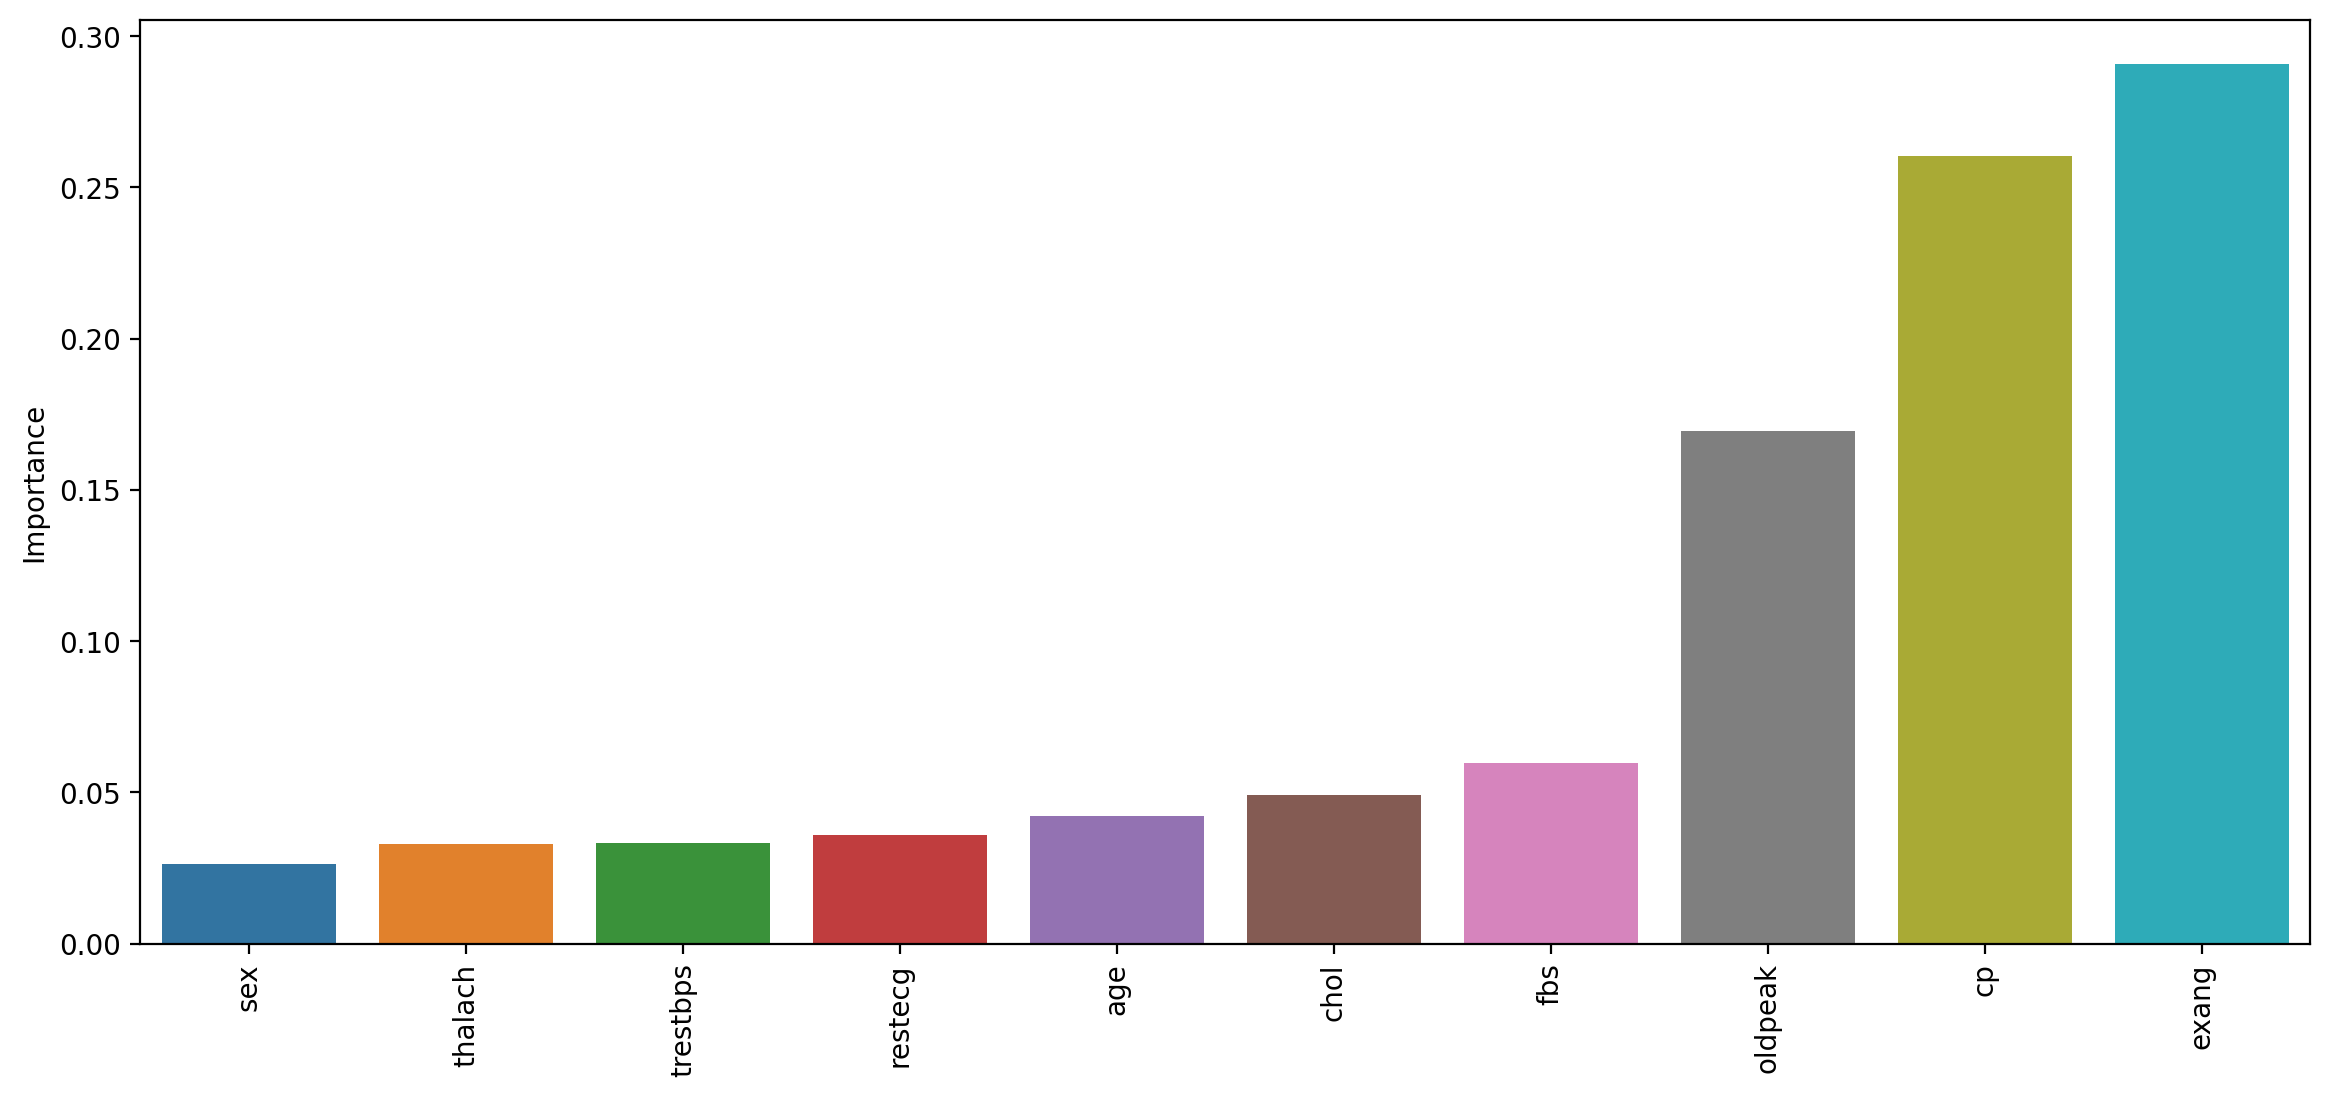

In [24]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);

In [ ]:
########

In [26]:
# DMatrix dla k-fold cv
dmatrix_data = xgb.DMatrix(X, y)

In [27]:
params = {
    "objective": "reg:logistic", 
    "max_depth": 3, 
    "booster": "gbtree",
    "learning_rate": 0.8  
} 
cv_results = xgb.cv(
    params=params,
    dtrain=dmatrix_data, 
    nfold=3,
    num_boost_round=200,  
    metrics=["error", "auc"], 
    as_pandas=True)
print(cv_results.head())

   train-error-mean  train-error-std  train-auc-mean  train-auc-std  \
0          0.138699         0.012566        0.902743       0.032228   
1          0.123262         0.010821        0.942287       0.008071   
2          0.104423         0.011875        0.955218       0.008163   
3          0.092440         0.014963        0.964778       0.008045   
4          0.089012         0.012627        0.969739       0.006401   

   test-error-mean  test-error-std  test-auc-mean  test-auc-std  
0         0.188267        0.031244       0.811528      0.067336  
1         0.212357        0.042492       0.834518      0.072147  
2         0.215688        0.044181       0.850685      0.077309  
3         0.208921        0.038033       0.853906      0.072450  
4         0.219125        0.039446       0.853257      0.068784  


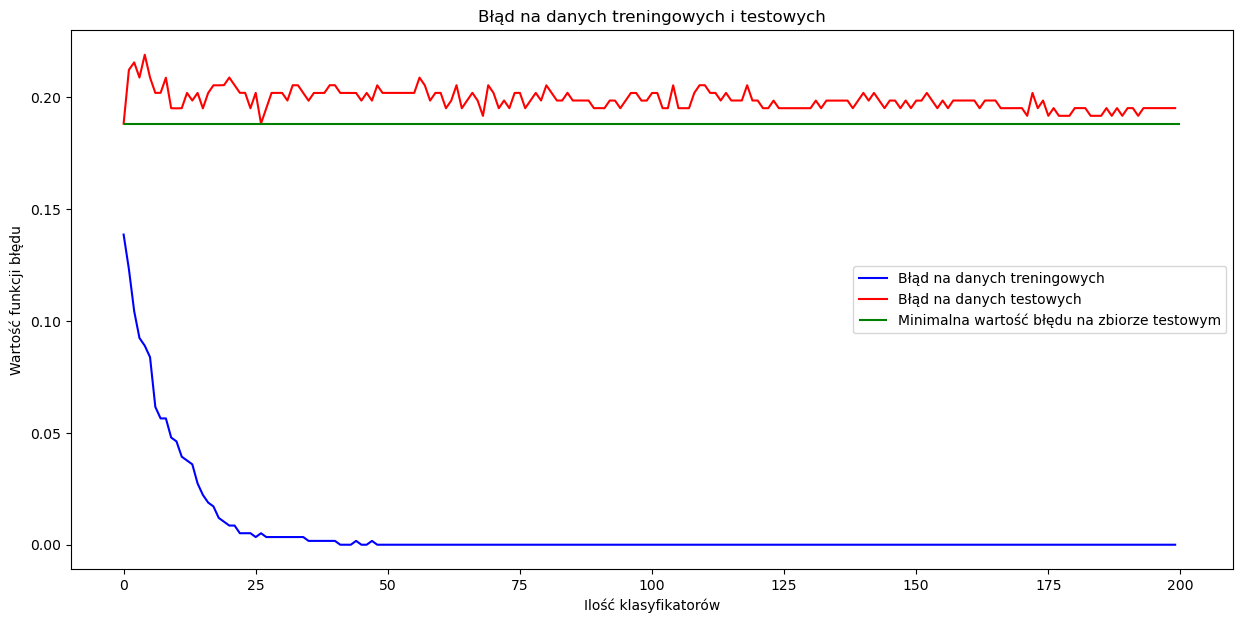

In [93]:
plt.figure(figsize=(15, 7))
plt.title("Błąd na danych treningowych i testowych")
plt.plot(cv_results["train-error-mean"], color="b", label='Błąd na danych treningowych')
plt.plot(cv_results["test-error-mean"], color="r", label='Błąd na danych testowych')
# plt.ylim((0., 0.2))
plt.hlines([cv_results["test-error-mean"].min()], xmin=0, xmax=200, color="g", label='Minimalna wartość błędu na zbiorze testowym')
plt.xlabel("Ilość klasyfikatorów")
plt.ylabel("Wartość funkcji błędu")
plt.legend()

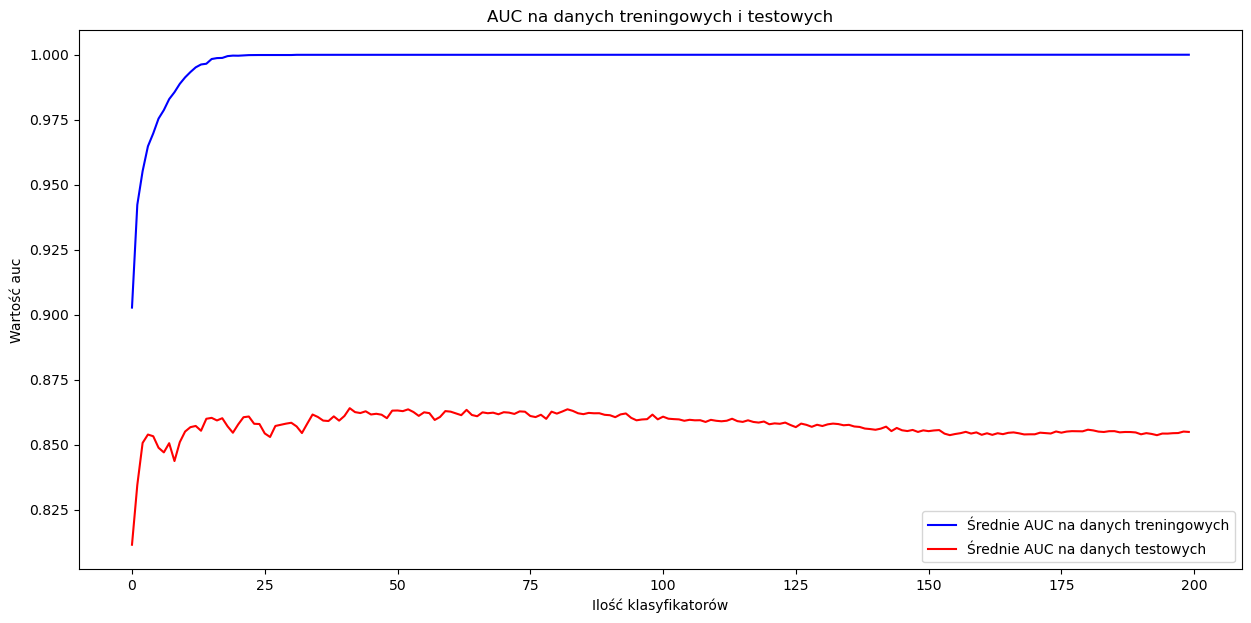

In [54]:
plt.figure(figsize=(15, 7))
plt.title("AUC na danych treningowych i testowych")
plt.plot(cv_results["train-auc-mean"], color="b", label='Średnie AUC na danych treningowych')
plt.plot(cv_results["test-auc-mean"], color="r", label = 'Średnie AUC na danych testowych')
# plt.ylim((0., 0.2))
plt.xlabel("Ilość klasyfikatorów")
plt.ylabel("Wartość auc")
plt.legend()

In [59]:
# Użycie klasycznego model_selection - sprawdzenie jak wyniki są zgodne?
clf = xgb.XGBClassifier(objective="reg:logistic", max_depth=3, 
                        learning_rate=0.8, n_estimators=5)
msel.cross_val_score(clf, X, y, cv=4, n_jobs=-1)

array([0.80821918, 0.75342466, 0.78082192, 0.52054795])

In [60]:
# wyniki
print("cv_Results: ", cv_results.iloc[-1])

cv_Results:  train-error-mean    0.000000
train-error-std     0.000000
train-auc-mean      1.000000
train-auc-std       0.000000
test-error-mean     0.195245
test-error-std      0.022579
test-auc-mean       0.854910
test-auc-std        0.066544
Name: 199, dtype: float64


In [61]:
print("acc: ", ((1- cv_results["test-error-mean"]).iloc[-1]))

acc:  0.8047548916473806


In [81]:
########